In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.set_printoptions(precision = 5,edgeitems = 11, linewidth = 200, suppress = True)
np.core.arrayprint._line_width = 180

In [10]:
ds = pd.read_excel("C:/Users/lu_fe/Downloads/Lista2_Conjunto1.xlsx", skiprows = 2).drop(columns = 
    ["Unnamed: 0","Unnamed: 1","Unnamed: 8"])
ds

,V1,V2,V3,V4,V5,V6,Classe
0,5.1,3.5,4.95,1.4,1.96,0.2,1
1,4.9,3.0,5.30,1.4,1.96,0.2,1
2,4.7,3.2,4.60,1.3,1.69,0.2,1
3,4.6,3.1,4.55,1.5,2.25,0.2,1
4,5.0,3.6,4.60,1.4,1.96,0.2,1
5,5.4,3.9,4.95,1.7,2.89,0.4,1
6,4.6,3.4,4.10,1.4,1.96,0.3,1
7,5.0,3.4,4.90,1.5,2.25,0.2,1
8,4.4,2.9,4.45,1.4,1.96,0.2,1
9,4.9,3.1,5.15,1.5,2.25,0.1,1


In [88]:
inputs = ds.drop(columns = "Classe")
inputs = np.asarray(inputs)

In [89]:
col = []
col.append(ds["V1"].to_numpy())
col.append(ds["V2"].to_numpy())
col.append(ds["V3"].to_numpy())
col.append(ds["V4"].to_numpy())
col.append(ds["V5"].to_numpy())
col.append(ds["V6"].to_numpy())
col.append(ds["Classe"].to_numpy())
col = np.asarray(col)

In [90]:
frequencies = []
for i in range(0,len(col)):
    (unique, counts) = np.unique(col[i], return_counts=True)
    freq = np.asarray((unique, counts)).T
    soma = freq[:,1].sum()
    freq[:,1] = 100*freq[:,1]/soma
    frequencies.append(freq)
#print(frequencies[6])

In [91]:
maximo = []
minimo = []
escala = []
for i in range(0,len(col)):
    maximo.append(max(col[i]))
    minimo.append(min(col[i]))
    escala.append(max(col[i])-min(col[i]))
#print(escala[0])

In [92]:
s,p = stats.shapiro(col[0])
print(s)
print(p)

0.9760899543762207
0.010180278681218624


In [93]:
z = np.abs(stats.zscore(ds))
limite = 3
#print(np.where(z>limite))
#ds_out= ds[(z < limite).all(axis=1)]
#ds.info()
#ds_out.info()

<function matplotlib.pyplot.show(*args, **kw)>

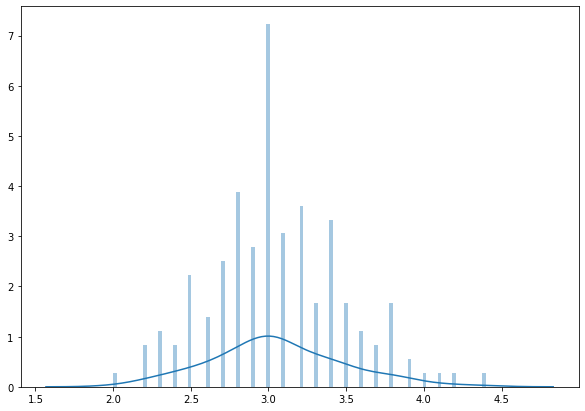

In [94]:
plt.figure(figsize=(10,7))
sns.distplot(col[1],bins = 100)
plt.show

In [95]:
cor = np.corrcoef(inputs, rowvar = False)
print(cor)

[[ 1.      -0.11757  0.93644  0.87175  0.89752  0.81794]
 [-0.11757  1.      -0.4585  -0.42844 -0.34149 -0.36613]
 [ 0.93644 -0.4585   1.       0.9315   0.92383  0.86132]
 [ 0.87175 -0.42844  0.9315   1.       0.98382  0.96287]
 [ 0.89752 -0.34149  0.92383  0.98382  1.       0.94592]
 [ 0.81794 -0.36613  0.86132  0.96287  0.94592  1.     ]]


In [96]:
col_norm = []
for i in range(0,len(col)):
    norm = np.linalg.norm(col[i])
    col_norm.append((col[i] / norm))

col_norm = np.asarray(col_norm).transpose()
print(col_norm)

[[0.07056 0.09254 0.05509 0.02755 0.0075  0.0115  0.0378 ]
 [0.0678  0.07932 0.05899 0.02755 0.0075  0.0115  0.0378 ]
 [0.06503 0.08461 0.0512  0.02558 0.00647 0.0115  0.0378 ]
 [0.06364 0.08197 0.05064 0.02952 0.00861 0.0115  0.0378 ]
 [0.06918 0.09519 0.0512  0.02755 0.0075  0.0115  0.0378 ]
 [0.07471 0.10312 0.05509 0.03345 0.01106 0.023   0.0378 ]
 [0.06364 0.0899  0.04563 0.02755 0.0075  0.01725 0.0378 ]
 [0.06918 0.0899  0.05453 0.02952 0.00861 0.0115  0.0378 ]
 [0.06088 0.07668 0.04953 0.02755 0.0075  0.0115  0.0378 ]
 [0.0678  0.08197 0.05732 0.02952 0.00861 0.00575 0.0378 ]
 [0.07471 0.09783 0.05843 0.02952 0.00861 0.0115  0.0378 ]
 ...
 [0.09547 0.08197 0.10184 0.10626 0.11164 0.12078 0.11339]
 [0.0927  0.08197 0.09738 0.11019 0.12006 0.13803 0.11339]
 [0.09547 0.08197 0.10184 0.10035 0.09958 0.13228 0.11339]
 [0.08025 0.07139 0.08403 0.10035 0.09958 0.10927 0.11339]
 [0.09408 0.08461 0.09794 0.1161  0.13327 0.13228 0.11339]
 [0.0927  0.08725 0.09404 0.11216 0.12439 0.14378 0

In [99]:
cov = np.cov(col_norm, rowvar = False)
m,v = np.linalg.eig(cor)
print("Autovetores: \n",v)
print("Autovalores: \n",m)

Autovetores: 
 [[ 0.41643 -0.34163 -0.5125  -0.17666 -0.64489  0.0115 ]
 [-0.19853 -0.93426  0.1323   0.02096  0.25459 -0.0706 ]
 [ 0.4428   0.02434 -0.50537 -0.16549  0.72063  0.03523]
 [ 0.4508   0.00657  0.2458   0.2842  -0.      -0.80966]
 [ 0.4472  -0.09214  0.20562  0.67139  0.       0.54634]
 [ 0.43346 -0.03633  0.60145 -0.63987 -0.       0.19903]]
Autovalores: 
 [4.81071 0.92405 0.21566 0.0404  0.      0.00918]
